In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [33]:
###Loading the dataset
data = pd.read_csv('C:\\Users\\Yousef\\Desktop\\Car details v3.csv', encoding= 'ISO-8859-1')

In [34]:
###Convert dataset into dataframe
df = pd.DataFrame(data)

In [35]:
###Display first 10 rows
print(df.head(10))

                                   name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2              Honda City 2017-2020 EXi  2006         158000     140000   
3             Hyundai i20 Sportz Diesel  2010         225000     127000   
4                Maruti Swift VXI BSIII  2007         130000     120000   
5         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
6          Maruti Wagon R LXI DUO BSIII  2007          96000     175000   
7                    Maruti 800 DX BSII  2001          45000       5000   
8                      Toyota Etios VXD  2011         350000      90000   
9  Ford Figo Diesel Celebration Edition  2013         200000     169000   

     fuel seller_type transmission         owner     mileage   engine  \
0  Diesel  Individual       Manual   First Owner   23.4 kmpl  1248 CC   
1  Diesel  Individual       

In [68]:
###Extracting information from the dataset like column names and type 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   object 
 9   engine         6717 non-null   object 
 10  max_power      6717 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
 13  brand          6717 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 787.1+ KB
None


In [69]:
###Count the unique values for every column
print(df.nunique())

name             1982
year               27
selling_price     670
km_driven         898
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         320
torque            441
seats               9
brand              31
dtype: int64


In [70]:
###Display dataframe rows and columns
print(df.shape)

(6717, 14)


In [39]:
###Statistical summary of data
print(df.describe()) 

              year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000


In [71]:
###Statistical summary of text columns
print(df.describe(include='object'))

                          name    fuel seller_type transmission        owner  \
count                     6717    6717        6717         6717         6717   
unique                    1982       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       118    3658        6024         6142         4176   

          mileage   engine max_power          torque   brand  
count        6717     6717      6717            6717    6717  
unique        393      121       320             441      31  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  Maruti  
freq          210      907       324             472    2089  


In [44]:
###Checking if the DataFrame has any Null or Duplicates values
print(df.isna().any().any())
print(df.duplicated().any())

False
False


In [41]:
###Dropping duplicated rows and Null values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

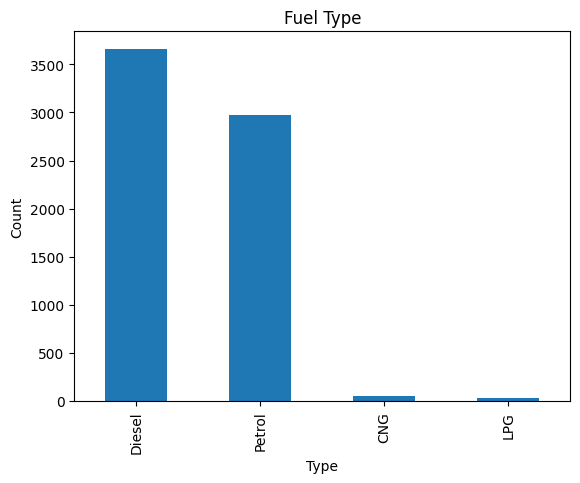

In [42]:
###Bar plot for fuel types
df.fuel.value_counts().plot(kind='bar')
plt.title('Fuel Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

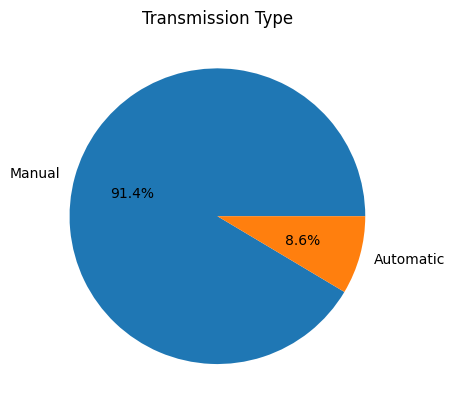

In [72]:
###Comparing manual and automatic
transmission_counts = df['transmission'].value_counts()
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%')
plt.title('Transmission Type')
plt.show()

In [46]:
###Filter the dataset to include only Diesel fuel type
Diesel_data = df[df['fuel'] == 'Diesel']

In [47]:
###Select relevant columns for further analysis
Diesel_data = Diesel_data[["name","year","selling_price","engine"]]
print(Diesel_data.head(10))
print(Diesel_data.info())

                                    name  year  selling_price   engine
0                 Maruti Swift Dzire VDI  2014         450000  1248 CC
1           Skoda Rapid 1.5 TDI Ambition  2014         370000  1498 CC
3              Hyundai i20 Sportz Diesel  2010         225000  1396 CC
8                       Toyota Etios VXD  2011         350000  1364 CC
9   Ford Figo Diesel Celebration Edition  2013         200000  1399 CC
10       Renault Duster 110PS Diesel RxL  2014         500000  1461 CC
12                Maruti Swift Dzire VDi  2009         280000  1248 CC
16                Maruti Ertiga SHVS VDI  2016         778000  1248 CC
17             Hyundai i20 1.4 CRDi Asta  2012         500000  1396 CC
19   Hyundai i20 2015-2017 Asta 1.4 CRDi  2016         680000  1396 CC
<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 8125
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3658 non-nul

In [48]:
### Group by year, calculate the mean selling price, and sort by year
yearly_prices = Diesel_data.groupby('year')['selling_price'].mean().sort_index()

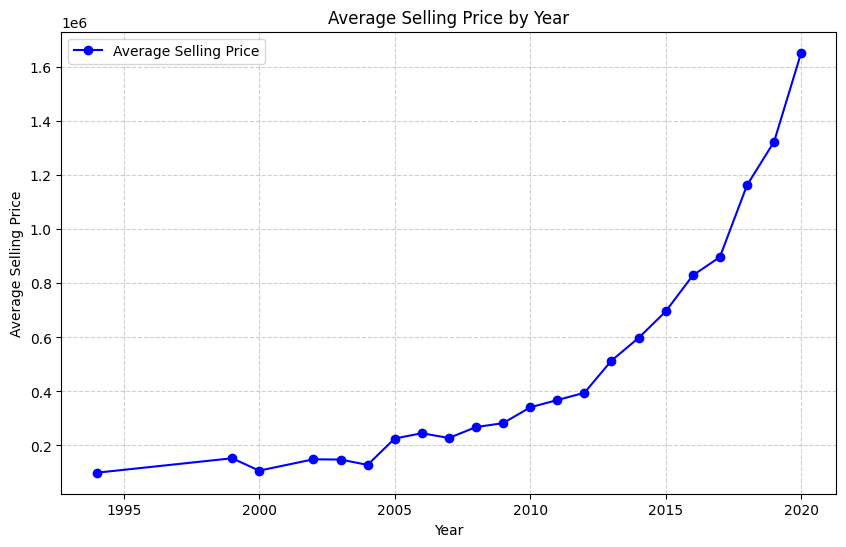

In [73]:
###Plot the line histogram for Average Selling Price by Year
plt.figure(figsize=(10, 6))
plt.plot(yearly_prices.index, yearly_prices.values, marker='o', color='b', label='Average Selling Price')
plt.title('Average Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [50]:
###select only the numeric columns and save them in a new DataFrame
numeric_df = df.select_dtypes(include=['number'])

In [51]:
###Check and extract information for only numeric columns
print(numeric_df.info()) 

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6717 non-null   int64  
 1   selling_price  6717 non-null   int64  
 2   km_driven      6717 non-null   int64  
 3   seats          6717 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 262.4 KB
None


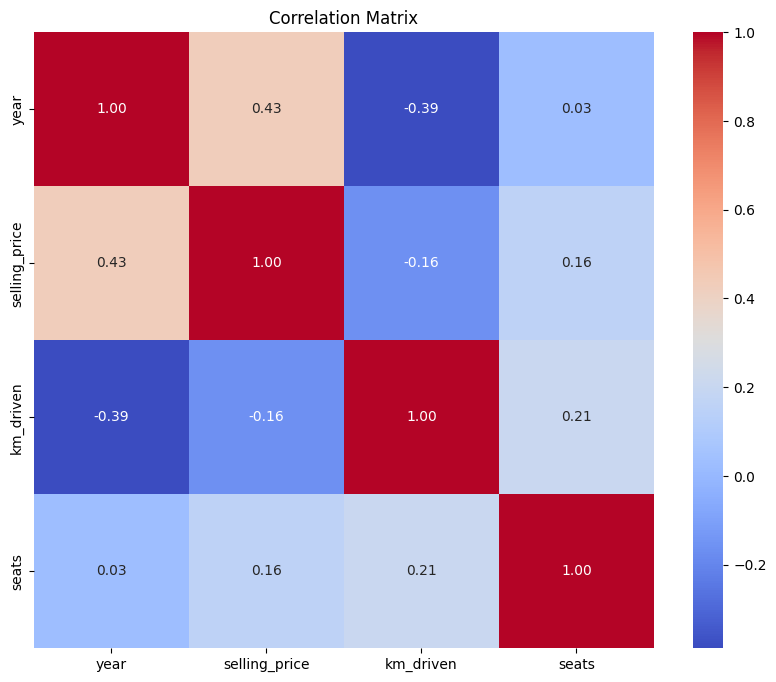

In [53]:
# Correlation Matrix for only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

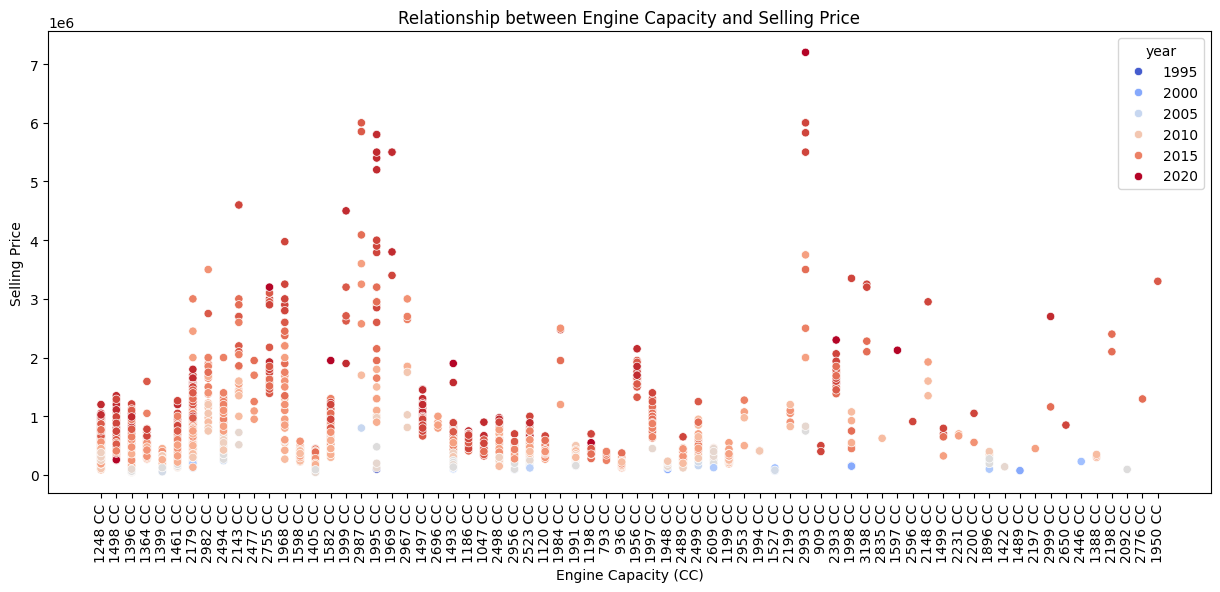

In [60]:
###Scatter plot to show the relationship between engine capacity and selling price
plt.figure(figsize=(15, 6))  # Wider figure
sns.scatterplot(x='engine', y='selling_price', data=Diesel_data, hue='year', palette='coolwarm')
plt.title('Relationship between Engine Capacity and Selling Price')
plt.xlabel('Engine Capacity (CC)')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)
plt.show()

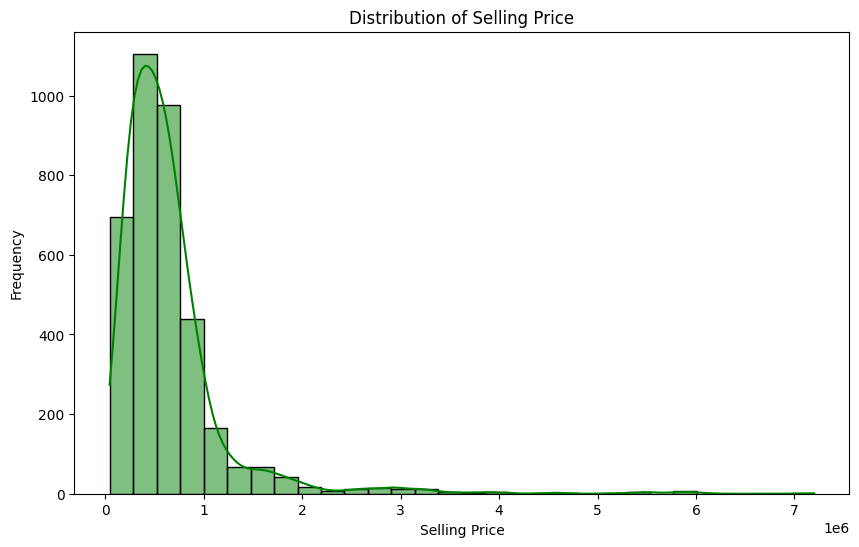

In [74]:
###Plot to show the distribution of selling price
plt.figure(figsize=(10, 6))
sns.histplot(Diesel_data['selling_price'], bins=30, kde=True, color='green')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

In [75]:
###Extract the brand and group by the brand and calculate the mean of selling price for every brand
df['brand'] = df['name'].apply(lambda x: x.split()[0])
brand_prices = df.groupby('brand')['selling_price'].mean().sort_values(ascending=False).head(10)

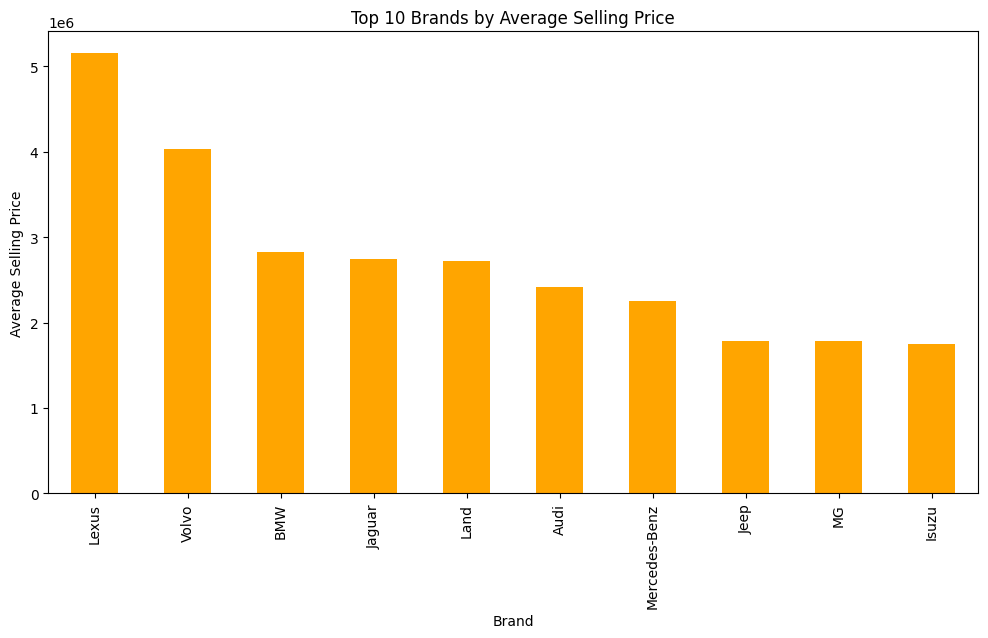

In [63]:
###Top 10 brands average selling price
plt.figure(figsize=(12, 6))
brand_prices.plot(kind='bar', color='orange')
plt.title('Top 10 Brands by Average Selling Price')
plt.xlabel('Brand')
plt.ylabel('Average Selling Price')
plt.show()

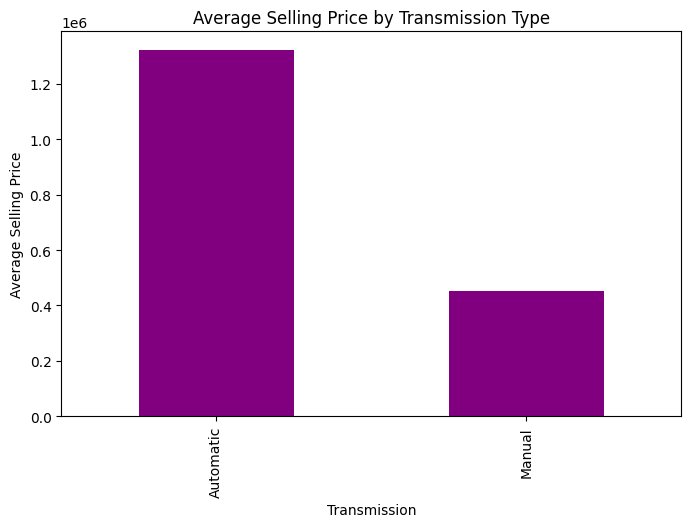

In [64]:
###Average Selling Price by Transmission Type
transmission_prices = df.groupby('transmission')['selling_price'].mean()

plt.figure(figsize=(8, 5))
transmission_prices.plot(kind='bar', color='purple')
plt.title('Average Selling Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Average Selling Price')
plt.show()

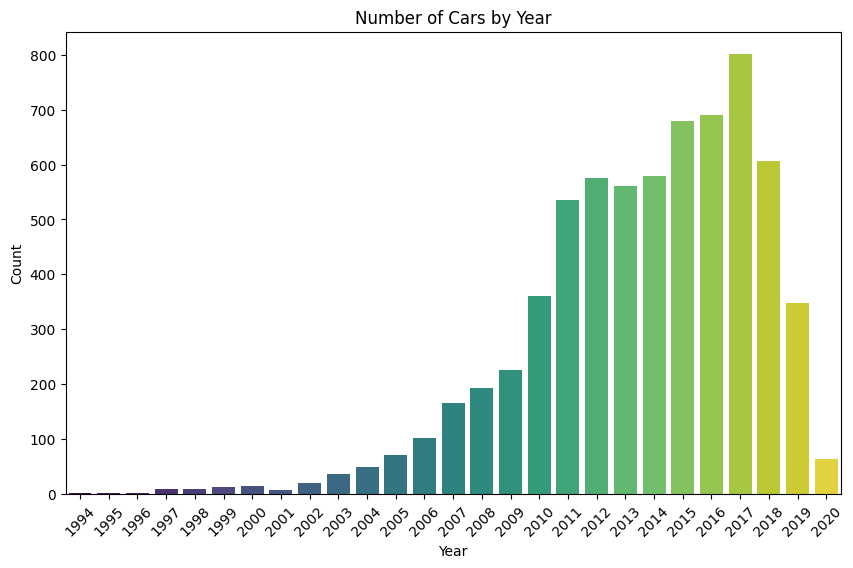

In [65]:
###Distribution of the number of cars by year of manufacture
plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='year', data=df, palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title('Number of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

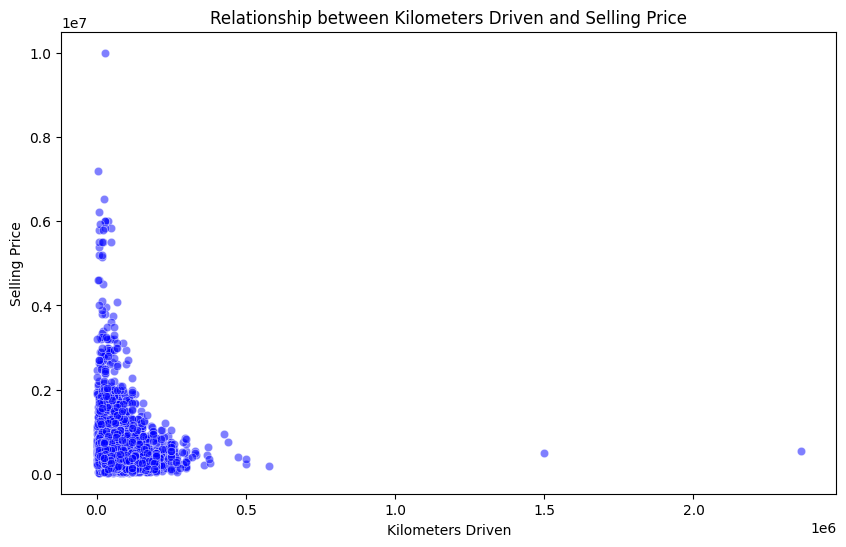

In [76]:
###The relationship between Kilometers Driven and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=df, alpha=0.5, color='blue')
plt.title('Relationship between Kilometers Driven and Selling Price')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()